In [149]:
import pandas as pd
import numpy as np

import sys
import os

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Audio

import librosa

In [57]:
# Setting folder paths to different datasets
RAVDESS_PATH = '../Data/audio_speech_actors_01-24'
CREMA_PATH = '../Data/AudioWAV'
SAVEE_PATH = '../Data/ALL'
TESS_PATH = '../Data/TESS Toronto emotional speech set data'

## Processing Datasets

#### 1. Ravdess

Here is the filename identifiers as per the official RAVDESS website:

- Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
- Vocal channel (01 = speech, 02 = song).
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
- Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
- Repetition (01 = 1st repetition, 02 = 2nd repetition).
- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

In [58]:
# List to store filepaths amd emotions
file_paths = []
file_emotions = []

# Collecting all actor folder names
ravdess_actors = os.listdir(RAVDESS_PATH)

# Collecting emotions and filepaths to list
for actor in ravdess_actors:
	actor_folder_path = os.path.join(RAVDESS_PATH, actor)
	actor_files = os.listdir(actor_folder_path)
	for file in actor_files:
		file_path = os.path.join(actor_folder_path, file)
		# Collecting the exact emotion from filename
		file_emotion = int(file.split('-')[2])

		# Appending data to list
		file_paths.append(file_path)
		file_emotions.append(file_emotion)

# Creating Dataframe with emotions and filepaths
Ravdess_df = pd.DataFrame()
Ravdess_df['Emotions'] = file_emotions
Ravdess_df['File_Path'] = file_paths

# Mapping integer values to string
emotion_map = {1 : 'neutral', 2 : 'calm', 3 : 'happy', 4 : 'sad', 5 : 'angry', 6 : 'fearful', 7 : 'disgust', 8 : 'surprised'}
Ravdess_df['Emotions'] = Ravdess_df['Emotions'].map(emotion_map)

#### 2. CREMA

In [59]:
# List to store filepaths amd emotions
file_paths = []
file_emotions = []

# Collecting all actor folder names
crema_files = os.listdir(CREMA_PATH)

# Collecting filepaths and emotions
for file in crema_files:
    
	# Collecting File Path
    file_path = os.path.join(CREMA_PATH, file)
    
	# Collecting file emotion
    file_emotion = file.split('_')[2]
    
	# Appending Emotions and filepaths to list
    file_paths.append(file_path)
    file_emotions.append(file_emotion)
    
# Creating Dataframe with emotions and filepaths
Crema_df = pd.DataFrame()
Crema_df['Emotions'] = file_emotions
Crema_df['File_Path'] = file_paths

# Mapping emotion abbrevations to full emotions
emotion_map = {'ANG': 'angry', 'DIS': 'disgust', 'FEA': 'fearful', 'HAP': 'happy', 'NEU': 'neutral', 'SAD': 'sad'}
Crema_df['Emotions'] = Crema_df['Emotions'].map(emotion_map)

## 3. SAVEE

In [82]:
# List to store filepaths amd emotions
file_paths = []
file_emotions = []

# Collecting all actor folder names
savee_files = os.listdir(SAVEE_PATH)

# Collecting file paths and emotions
for file in savee_files:
    
	# Collecting filepath
    file_path = os.path.join(SAVEE_PATH, file)
    
	# File Emotion
    file_emotion = file.split('_')[1][:2]
    
	# Appending to list
    file_paths.append(file_path)
    file_emotions.append(file_emotion)
    
# Creating Dataframe with emotions and filepaths
Savee_df = pd.DataFrame()
Savee_df['Emotions'] = file_emotions
Savee_df['File_Path'] = file_paths

# Applying map to get complete emotions
emotion_map = {'sa': 'sad', 'su': 'surprised', 'n1': 'neutral', 'n2': 'neutral', 'n3': 'neutral', 'n0': 'neutral', 'a0': 'angry', 'a1': 'angry', 'd0': 'disgust', 'd1': 'disgust', 'f0': 'fearful', 'f1': 'fearful', 'h0': 'happy', 'h1': 'happy'}
Savee_df['Emotions'] = Savee_df['Emotions'].map(emotion_map)

## 4. TESS

In [103]:
# List to store filepaths amd emotions
file_paths = []
file_emotions = []

# Collecting all actor folder names
tess_folders = os.listdir(TESS_PATH)

# Collecting filepath and emotions to list
for emotion_folder in tess_folders:
	folder_path = os.path.join(TESS_PATH, emotion_folder)
	sub_files = os.listdir(folder_path)
	
	# Diving inside each folder
	for file in sub_files:

		# Colleccting filepath
		fle_path = os.path.join(folder_path, file)
				
		# Collecting Emotions 
		file_emotion = file.split('.')[0].split('_')[-1]

		# Appending to list
		file_paths.append(file_path)
		file_emotions.append(file_emotion)

# Creating Dataframe with emotions and filepaths
Tess_df = pd.DataFrame()
Tess_df['Emotions'] = file_emotions
Tess_df['File_Path'] = file_paths

# Applying map to get complete emotions
emotion_map = {'surprise': 'surprised', 'ps': 'surprised', 'Fear': 'fear', 'Sad': 'sad'}
Tess_df['Emotions'] = Tess_df['Emotions'].replace(emotion_map)

## 5. Creating Master DataFrame

In [108]:
Masterdf = pd.concat([Ravdess_df, Crema_df, Savee_df, Tess_df]).reset_index(drop=1)
Masterdf.to_csv('../Output/Master All Path Emotions.csv', index=False)

## Data Visualisation and Exploration

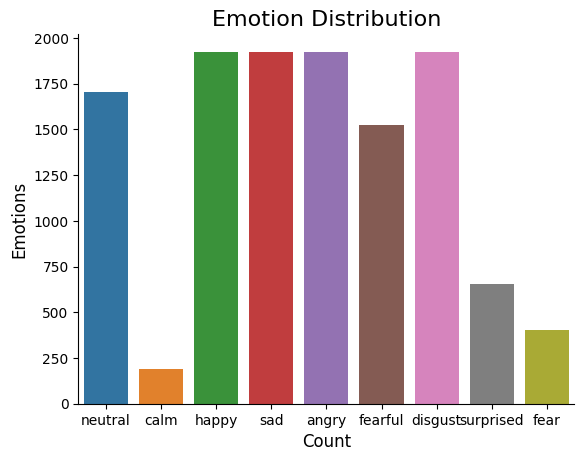

In [134]:
# Checking distribution of each emotion
sns.countplot(data = Masterdf, x='Emotions', hue='Emotions', palette='tab10')
plt.title('Emotion Distribution', size=16)
plt.ylabel('Emotions', size=12)
plt.xlabel('Count', size=12)
sns.despine()
plt.show()

In [173]:
# Creating functions for Waveplot of an audio signal
def plot_wave(data, sr, emotion=None):
	plt.figure(figsize=(12, 6))
	plt.subplot(2, 1, 1)
	librosa.display.waveshow(y=data, sr=sr, alpha=0.8)
	if emotion != None:
		plt.title(f'Wave Plot for {emotion} Emotion')
	else:
		plt.title(f'Wave Plot Selected Sample')

# Function for plotting Spectrogram
def plot_spectrogram(data, sr, emotion=None):
	
	# Applying stft
	data = librosa.stft(data)
	data_db = librosa.amplitude_to_db(abs(data))
	plt.figure(figsize=(12, 3))
	if emotion != None:
		plt.title(f'Spectrogram for audio with {emotion} emotion', size=15)
	else:
		plt.title(f'Spectrogram for Selected Sample', size=15)
	# Plotting specgram
	librosa.display.specshow(data_db, sr=sr, x_axis='time', y_axis='hz')
	plt.colorbar(format='%+2.0f dB')
	plt.show()

def plot_all(emotion):
	# Selecting Sample File
	sample_file = Masterdf[Masterdf['Emotions'] == emotion]
	sample_file_path = sample_file['File_Path'].iloc[0]

	# Loading Audio File
	data, sr = librosa.load(sample_file_path, sr=22050)
	
	# Playing Audio
	display(Audio(sample_file_path))

	# Plotting Waveplot
	plot_wave(data, sr, emotion)

	# Plotting the spectrogram
	plot_spectrogram(data, sr, emotion=emotion)



Plotting Everything for neutral


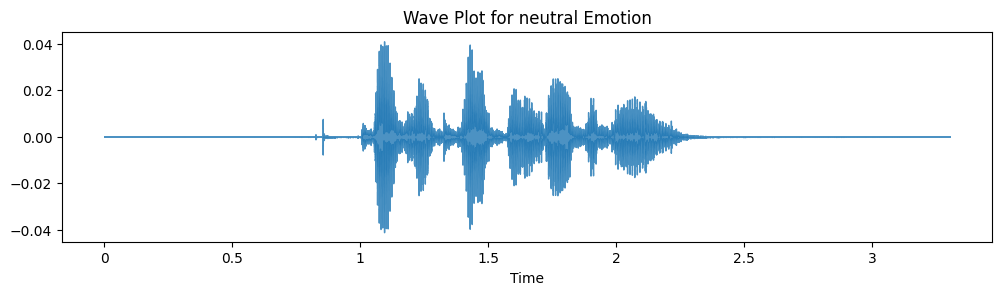

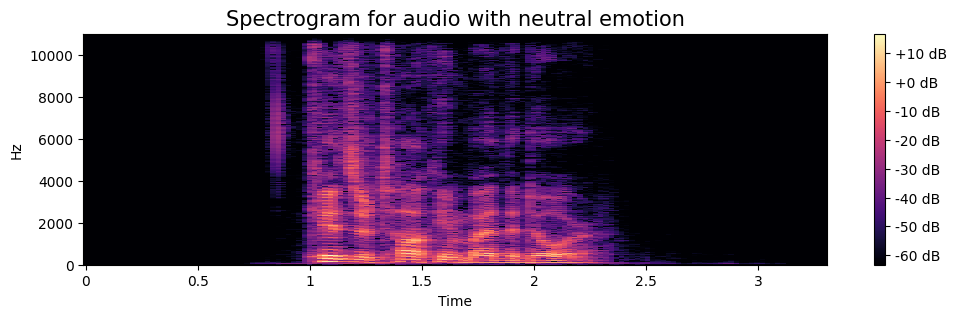

Plotting Everything for calm


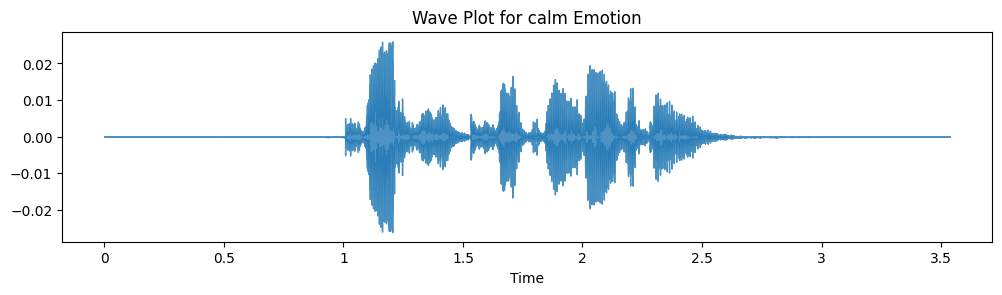

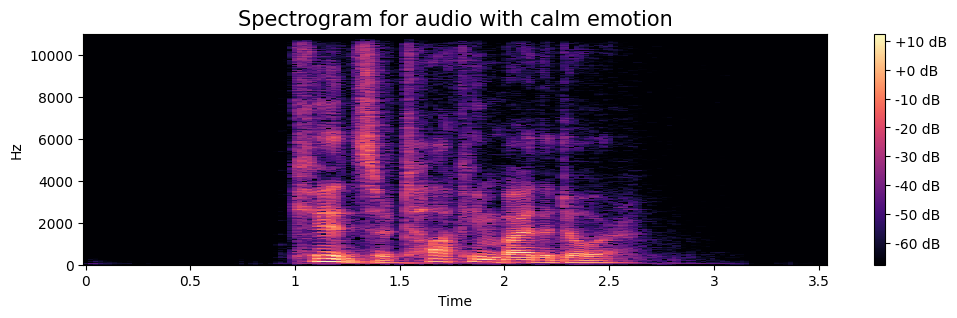

Plotting Everything for happy


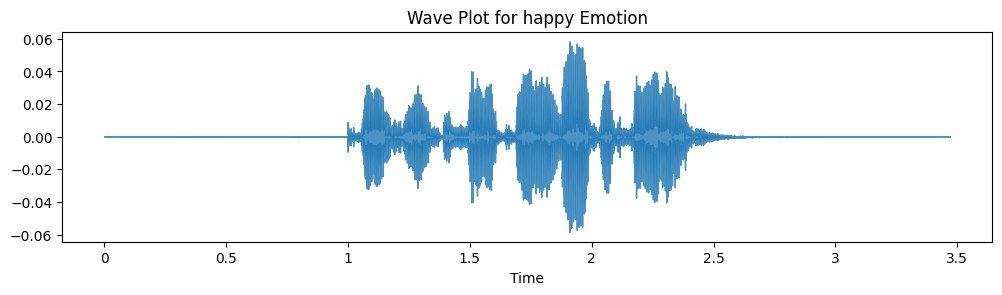

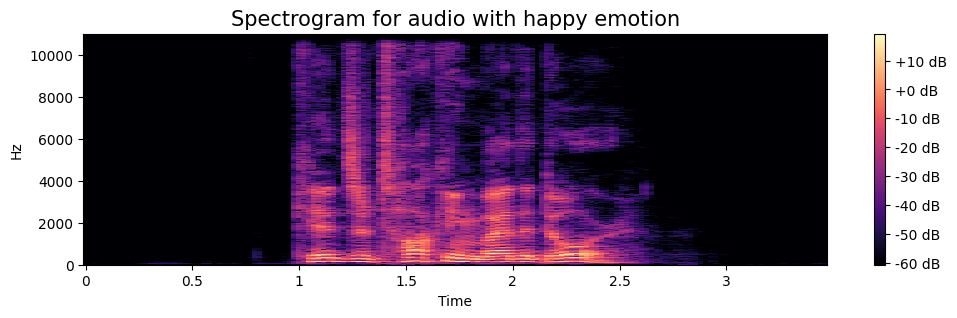

Plotting Everything for sad


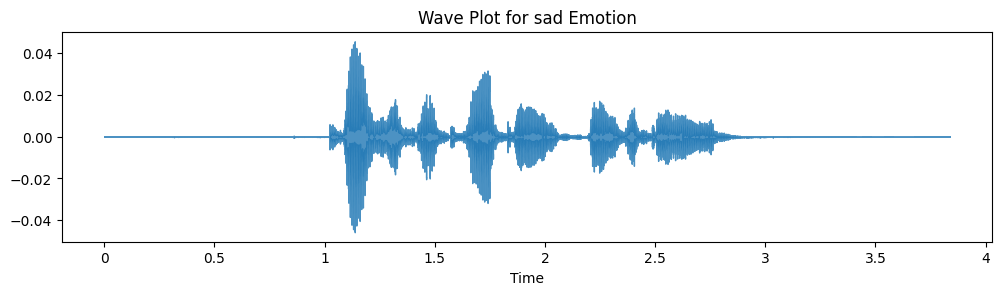

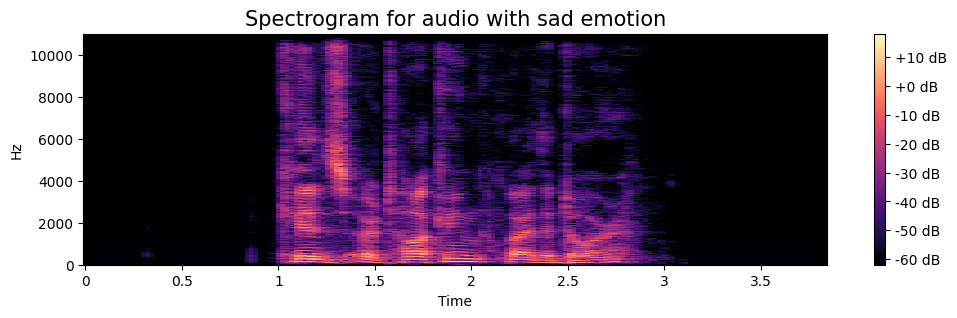

Plotting Everything for angry


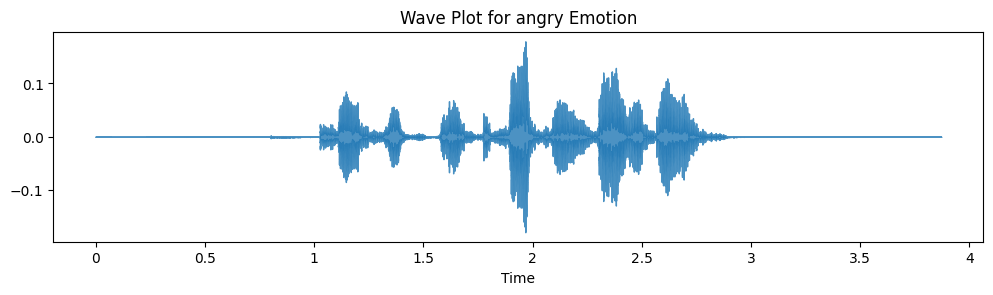

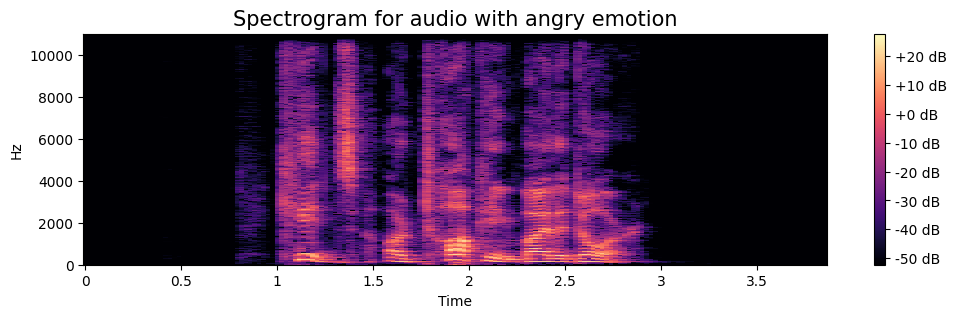

Plotting Everything for fearful


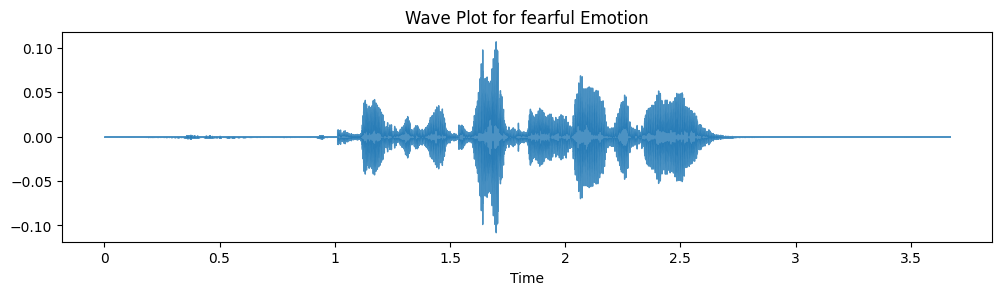

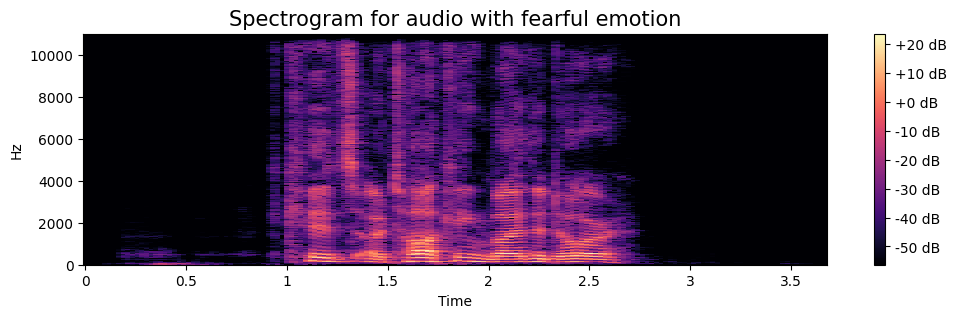

Plotting Everything for disgust


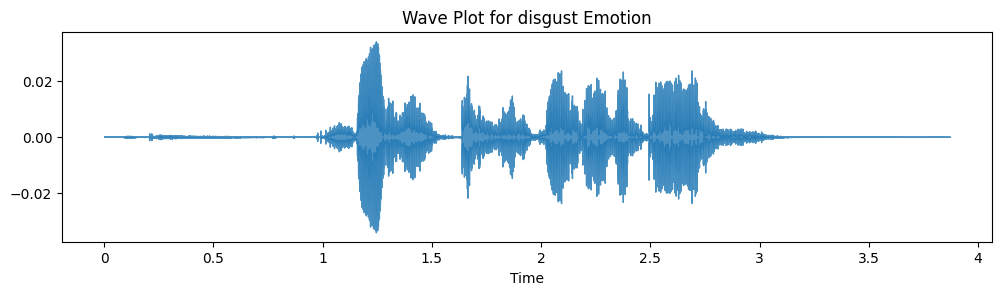

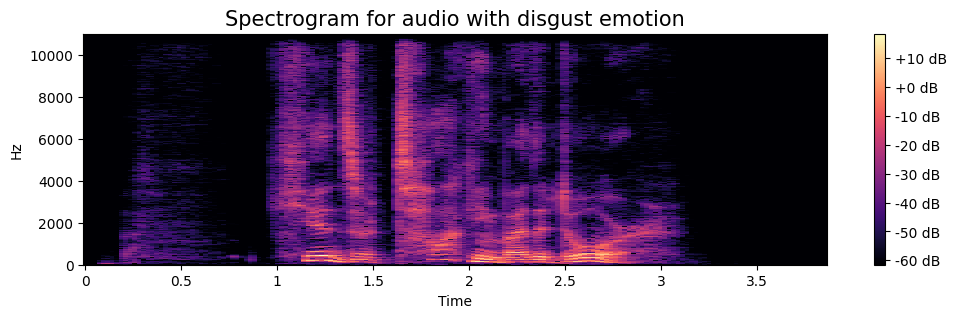

Plotting Everything for surprised


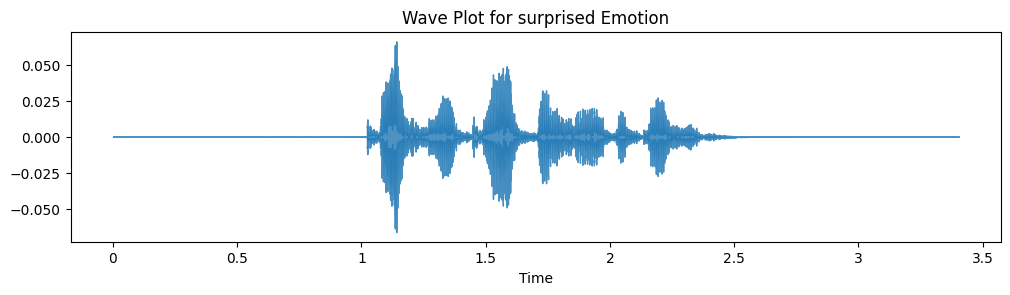

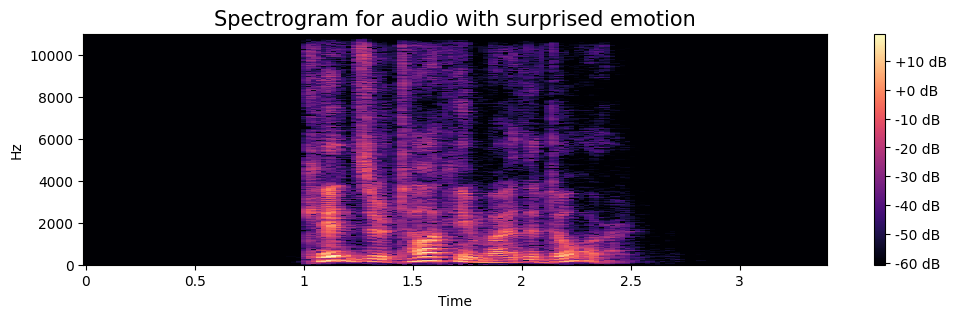

Plotting Everything for fear


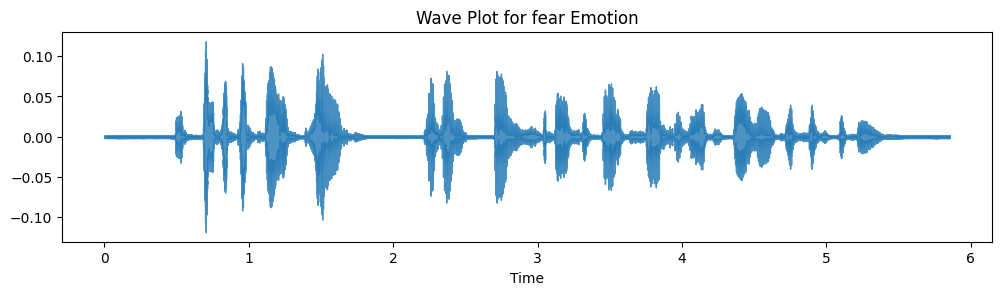

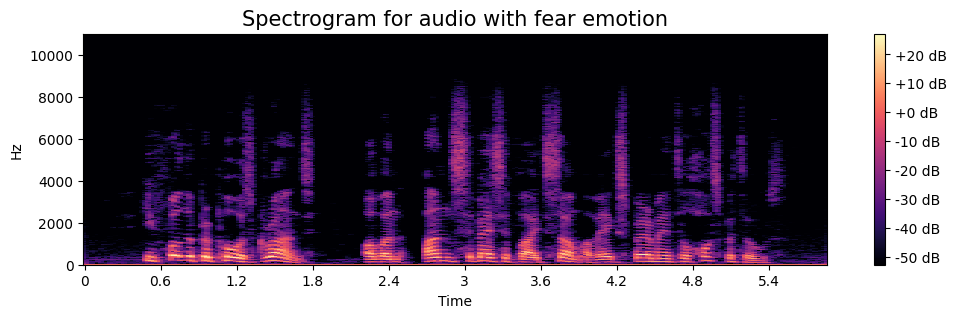

In [174]:
# Plotting everything for all emotions
all_emotions = Masterdf['Emotions'].unique().tolist()
for emotion in all_emotions:
    print(f'Plotting Everything for {emotion}')
    plot_all(emotion)